# qecsim demos

## Plotting logical failure rate as a function of physical error rate for linear stabilizer codes
This demo shows how to plot statistics on many error correction simulation runs, see figure for more details.

The code makes use of `qecsim.app.run(code, error_model, decoder, error_probability, max_runs, max_failures)`.

### Initialise run parameters

In [1]:
%matplotlib inline
import collections
import itertools
import numpy as np
import matplotlib.pyplot as plt
from qecsim import app
from qecsim.models.generic import DepolarizingErrorModel, NaiveDecoder
from qecsim.models.basic import FiveQubitCode, SteaneCode

# set models
codes = [FiveQubitCode(), SteaneCode()]
error_model = DepolarizingErrorModel()
decoder = NaiveDecoder()
# set physical error probabilities
error_probability_min, error_probability_max = 0, 0.5
error_probabilities = np.linspace(error_probability_min, error_probability_max, 20)
# set max_runs for each probability
max_runs = 10000

# print run parameters
print('Codes:', [code.label for code in codes])
print('Error model:', error_model.label)
print('Decoder:', decoder.label)
print('Error probabilities:', error_probabilities)
print('Maximum runs:', max_runs)

Codes: ['5-qubit', 'Steane']
Error model: Depolarizing
Decoder: Naive
Error probabilities: [0.         0.02631579 0.05263158 0.07894737 0.10526316 0.13157895
 0.15789474 0.18421053 0.21052632 0.23684211 0.26315789 0.28947368
 0.31578947 0.34210526 0.36842105 0.39473684 0.42105263 0.44736842
 0.47368421 0.5       ]
Maximum runs: 10000


### Run simulations

In [2]:
# run simulations and print data from middle run to view format
data = [app.run(code, error_model, decoder, error_probability, max_runs=max_runs)
        for code in codes for error_probability in error_probabilities]
print(data[len(data)//2])

{'code': 'Steane', 'n_k_d': (7, 1, 3), 'time_steps': 1, 'error_model': 'Depolarizing', 'decoder': 'Naive', 'error_probability': 0.0, 'measurement_error_probability': 0.0, 'n_run': 10000, 'n_success': 10000, 'n_fail': 0, 'error_weight_total': 0, 'error_weight_pvar': 0, 'logical_failure_rate': 0.0, 'physical_error_rate': 0.0, 'wall_time': 4.385910160999998}


### Prepare data for plotting


In [3]:
# prepare code to x,y map and print
code_to_xys = {}
for run in data:
    xys = code_to_xys.setdefault(run['code'], [])
    xys.append((run['physical_error_rate'], run['logical_failure_rate']))
print('\n'.join('{}: {}'.format(k, v) for k, v in code_to_xys.items()))

5-qubit: [(0.0, 0.0), (0.02538, 0.0066), (0.05318, 0.0236), (0.07962000000000001, 0.0553), (0.10655999999999999, 0.0899), (0.1323, 0.1285), (0.16054000000000002, 0.18), (0.18328, 0.2182), (0.20922, 0.2667), (0.23772, 0.318), (0.26306, 0.3722), (0.2899, 0.4141), (0.31882, 0.4641), (0.34198, 0.5064), (0.36914, 0.5452), (0.39558000000000004, 0.5814), (0.42031999999999997, 0.6191), (0.44793999999999995, 0.6423), (0.47342, 0.6649), (0.5019600000000001, 0.6862)]
Steane: [(0.0, 0.0), (0.025957142857142856, 0.008), (0.05231428571428571, 0.0401), (0.07984285714285715, 0.0747), (0.1066, 0.1309), (0.13392857142857142, 0.1803), (0.15657142857142858, 0.2335), (0.18775714285714287, 0.2986), (0.21158571428571427, 0.346), (0.2362, 0.3987), (0.2622285714285714, 0.4426), (0.2913, 0.4907), (0.3153714285714286, 0.5375), (0.34125714285714287, 0.5759), (0.3663571428571428, 0.6), (0.39808571428571426, 0.6393), (0.4218857142857143, 0.6588), (0.44854285714285713, 0.6869), (0.47174285714285713, 0.6941), (0.4999

### Plot logical failure rate against physical error rate

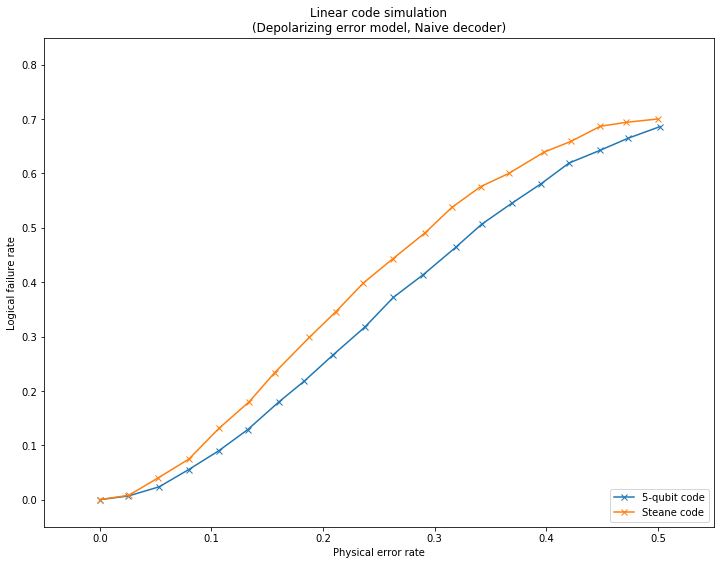

In [4]:
# format plot
fig = plt.figure(1, figsize=(12, 9))
plt.title('Linear code simulation\n({} error model, {} decoder)'.format(error_model.label, decoder.label))
plt.xlabel('Physical error rate')
plt.ylabel('Logical failure rate')
plt.xlim(error_probability_min-0.05, error_probability_max+0.05)
plt.ylim(-0.05, 0.85)
# add data
for code, xys in code_to_xys.items():
    plt.plot(*zip(*xys), 'x-', label='{} code'.format(code))
plt.legend(loc='lower right')
plt.show()

Fig. 1. Logical failure rate as a function of physical error rate for linear stabilizer codes.

Definitions:

* A physical error occurs when the generated error acts non-trivially on a physical qubit.  
  $(\text{physical error rate}) = mean(\text{error weight}) / (\text{number of physical qubits})$.

* A logical failure occurs when the combined action of the generated error and recovery operation acts non-trivially on the codespace, irrespective of the number of logical qubits encoded.  
  $(\text{logical failure rate}) = (\text{number of logical failures}) / (\text{number of runs})$.